In [1]:
#Step 1: Load the Dataset
import pandas as pd

In [2]:
# Load the dataset
file_path = r'C:\Users\ashut\Downloads\creditcard.csv'  # Update with your file path
data = pd.read_csv(file_path)

In [4]:
# Inspect the data
print("Dataset Shape:", data.shape)
print("Columns:", data.columns)
print(data.head())

Dataset Shape: (284807, 31)
Columns: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.1

In [5]:
#Step 2: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Class distribution
class_counts = data['Class'].value_counts()

C:\Users\ashut\AppData\Local\Temp\ipykernel_5680\3405210002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


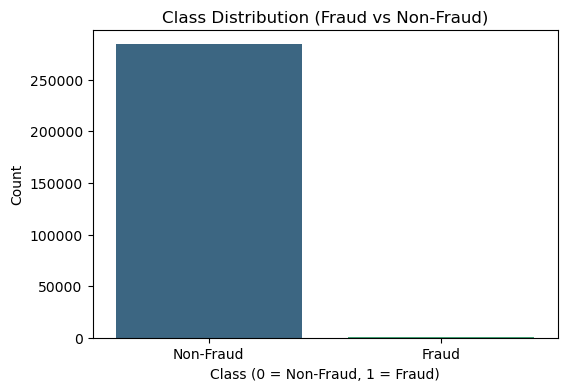

In [7]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Non-Fraud", "Fraud"])
plt.show()

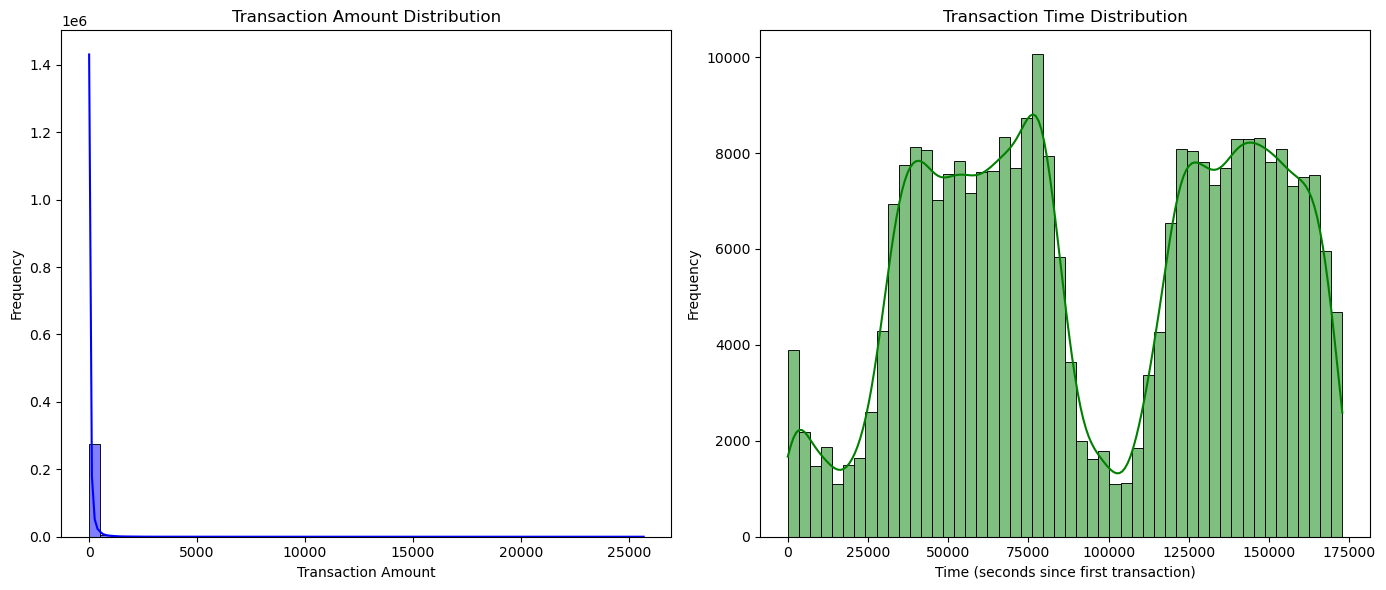

In [8]:
# Plot the distribution of 'Amount' and 'Time'
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Transaction Amount distribution
sns.histplot(data['Amount'], bins=50, color="blue", ax=axes[0], kde=True)
axes[0].set_title("Transaction Amount Distribution")
axes[0].set_xlabel("Transaction Amount")
axes[0].set_ylabel("Frequency")

# Transaction Time distribution
sns.histplot(data['Time'], bins=50, color="green", ax=axes[1], kde=True)
axes[1].set_title("Transaction Time Distribution")
axes[1].set_xlabel("Time (seconds since first transaction)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [11]:
#Step 3: Data Preprocessing

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [12]:
# Features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print("Original class distribution:", y_train.value_counts())
print("Resampled class distribution:", y_train_res.value_counts())

Original class distribution: Class
0    227451
1       394
Name: count, dtype: int64
Resampled class distribution: Class
0    227451
1    227451
Name: count, dtype: int64


In [14]:
#Step 4: Feature Scaling
from sklearn.preprocessing import StandardScaler

In [15]:
# Apply StandardScaler to 'Amount' and 'Time'
scaler = StandardScaler()
X_train_res[['Amount', 'Time']] = scaler.fit_transform(X_train_res[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [16]:
# Check the scaled features
print(X_train_res[['Amount', 'Time']].head())

     Amount      Time
0 -0.382025  1.159997
1 -0.219953  0.618522
2 -0.372998  1.288504
3  0.102926  0.132396
4 -0.310850 -0.095434


In [21]:
#Step 5: Model Building

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Random Forest Classifier with minimal parameters
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=10,      # Limit the depth to prevent overfitting
    random_state=42    # Ensures reproducibility
)

# Train the model on the resampled training data
rf_model.fit(X_train_res, y_train_res)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compute ROC-AUC Score
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.89      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
 [[56810    54]
 [   11    87]]

ROC-AUC Score: 0.9852


In [29]:
#Step 6: Model Saving and Deployment Plan

import joblib

# Save the model
joblib.dump(rf_model, "simplified_rf_model.pkl")
print("Model saved as simplified_rf_model.pkl")

Model saved as simplified_rf_model.pkl


In [31]:
# Load the saved model
loaded_model = joblib.load("simplified_rf_model.pkl")
print("Model loaded successfully")

# Make predictions on new data
new_predictions = loaded_model.predict(X_test[:5])
print("Predictions on new data:", new_predictions)

Model loaded successfully
Predictions on new data: [1 0 0 0 0]


In [36]:
#Step 7: Evaluate the Model on the Full Test Set
#Full test set evaluation

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the full test dataset
y_pred_full = loaded_model.predict(X_test)

# Generate evaluation metrics
print("Full Test Set Classification Report:\n", classification_report(y_test, y_pred_full))
print("\nFull Test Set Confusion Matrix:\n", confusion_matrix(y_test, y_pred_full))

# Compute ROC-AUC
y_pred_prob_full = loaded_model.predict_proba(X_test)[:, 1]
roc_auc_full = roc_auc_score(y_test, y_pred_prob_full)
print(f"\nFull Test Set ROC-AUC Score: {roc_auc_full:.4f}")

Full Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.89      0.73        98

    accuracy                           1.00     56962
   macro avg       0.81      0.94      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Full Test Set Confusion Matrix:
 [[56810    54]
 [   11    87]]

Full Test Set ROC-AUC Score: 0.9852


In [43]:
#Step 8: Test Predictions on New/Simulated Data

import pandas as pd

# Replace column names with the correct feature names used in your dataset
feature_names = X_train.columns  # Use the same feature names as in the training data
simulated_data_df = pd.DataFrame(simulated_data, columns=feature_names)

# Make predictions with the DataFrame
simulated_predictions = loaded_model.predict(simulated_data_df)
simulated_probabilities = loaded_model.predict_proba(simulated_data_df)[:, 1]

print("Simulated Data Predictions:", simulated_predictions)
print("Fraud Probabilities:", simulated_probabilities)

Simulated Data Predictions: [0 0]
Fraud Probabilities: [0.01849946 0.09068092]


In [45]:
#Step 9 - Deployment Plan

import joblib

# Save the model
joblib.dump(loaded_model, "final_rf_model.pkl")
print("Model saved as final_rf_model.pkl")

Model saved as final_rf_model.pkl


In [47]:
# Load the saved model
deployed_model = joblib.load("final_rf_model.pkl")
print("Model loaded successfully")

Model loaded successfully


In [52]:
#Step 10: Test Model Loading

# Load the saved model
deployed_model = joblib.load("final_rf_model.pkl")
print("Model loaded successfully")

# Make predictions with the reloaded model
new_predictions = deployed_model.predict(X_test[:5])
new_probabilities = deployed_model.predict_proba(X_test[:5])[:, 1]

print("Predictions on new test data:", new_predictions)
print("Fraud probabilities on new test data:", new_probabilities)

Model loaded successfully
Predictions on new test data: [1 0 0 0 0]
Fraud probabilities on new test data: [0.99944777 0.0309337  0.02403235 0.01659746 0.00282702]
